In [3]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename
# Ẩn cửa sổ gốc của tkinter
Tk().withdraw()
# Mở hộp thoại chọn file
file_path = askopenfilename(title="Chọn file CSV", filetypes=[("CSV files", "*.csv")])

2025-07-12 22:02:24.199 python[10843:1383022] +[CATransaction synchronize] called within transaction


In [114]:
# 1. Làm sạch tên cột trong df gốc
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace(r'[^\w]', '', regex=True)
)
print(df.columns.tolist())

['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW

In [122]:
#  1.Ép kiểu ngày tháng
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(" Cột 'Date' sau khi ép kiểu:")
print(df['Date'].head(), '\n')
# 2. Ép kiểu nhiệt độ
df['Temperature_Mean'] = pd.to_numeric(df['Temperature_Mean'], errors='coerce')
print(" Cột 'Temperature_Mean' sau khi ép kiểu:")
print(df['Temperature_Mean'].head(), '\n')
#  3. Ép kiểu % bleaching
df['Percent_Bleaching'] = pd.to_numeric(df['Percent_Bleaching'], errors='coerce')
print(" Cột 'Percent_Bleaching' sau khi ép kiểu:")
print(df['Percent_Bleaching'].head(), '\n')
#  4. Ép kiểu độ sâu
df['Depth_m'] = pd.to_numeric(df['Depth_m'], errors='coerce')
print("Cột 'Depth_m' sau khi ép kiểu:")
print(df['Depth_m'].head()) 

 Cột 'Date' sau khi ép kiểu:
0   2005-09-15
1   1991-03-15
2   2006-01-15
3   2006-04-15
4   2006-04-15
Name: Date, dtype: datetime64[ns] 

 Cột 'Temperature_Mean' sau khi ép kiểu:
0    300.67
1    300.73
2    300.32
3    300.38
4    300.38
Name: Temperature_Mean, dtype: float64 

 Cột 'Percent_Bleaching' sau khi ép kiểu:
0    50.2
1    50.7
2    50.9
3    50.9
4    50.9
Name: Percent_Bleaching, dtype: float64 

Cột 'Depth_m' sau khi ép kiểu:
0    10.00
1    14.00
2     7.00
3     9.02
4    12.50
Name: Depth_m, dtype: float64


In [150]:
# Lọc theo 2 quốc gia quan tâm
df_filtered = df[df['Country_Name'].isin(['Indonesia', 'Philippines'])].copy()
print("Số dòng còn lại (chỉ lấy Indonesia & Philippines):", len(df_filtered))
# Lọc theo khoảng thời gian quan tâm 
df_filtered = df_filtered[
    (df_filtered['Date'] >= '2019-01-01') &
    (df_filtered['Date'] <= '2020-12-31')
]
print("Lọc theo năm 2019–2020:", len(df_filtered))
# Lọc theo độ sâu quan tâm 
df_filtered = df_filtered[df_filtered['Depth_m'].between(0, 5)]
print("Lọc độ sâu từ 0 đến 5m:", len(df_filtered))
# Chuyển nhiệt độ từ Kelvin → Celsius
df_filtered['Temperature_Mean'] = df_filtered['Temperature_Mean'] - 273.15
print("Nhiệt độ đã chuyển sang °C (5 dòng đầu):")
print(df_filtered['Temperature_Mean'].head(), '\n')
# Loại bỏ dòng thiếu dữ liệu quan trọng
df_filtered = df_filtered.dropna(subset=[
    'Date', 'Temperature_Mean', 'Percent_Bleaching',
    'Latitude_Degrees', 'Longitude_Degrees'
])
print(" Sau khi drop NaN:", len(df_filtered))
 # Kiểm tra sơ bộ
print(" Dữ liệu mẫu sau khi lọc sạch:")



Số dòng còn lại (chỉ lấy Indonesia & Philippines): 4834
Lọc theo năm 2019–2020: 438
Lọc độ sâu từ 0 đến 5m: 159
Nhiệt độ đã chuyển sang °C (5 dòng đầu):
12322    28.44
12323    28.44
12342    28.44
12343    28.44
12348    28.44
Name: Temperature_Mean, dtype: float64 

 Sau khi drop NaN: 149
 Dữ liệu mẫu sau khi lọc sạch:


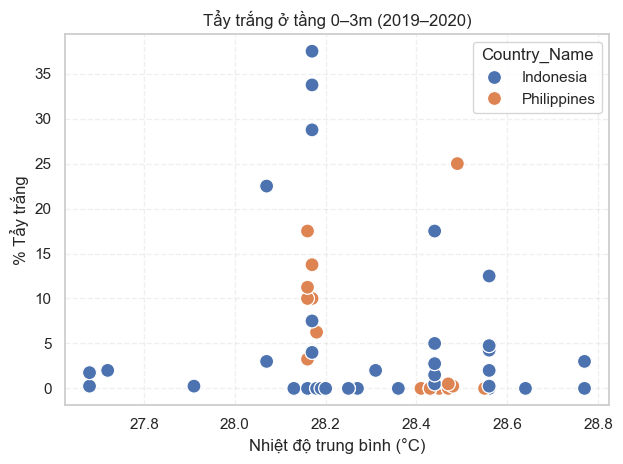

In [152]:
sns.scatterplot(
    data=df_filtered,
    x='Temperature_Mean',
    y='Percent_Bleaching',
    hue='Country_Name',
    s=100
)
plt.title('Tẩy trắng ở tầng 0–3m (2019–2020)')
plt.xlabel('Nhiệt độ trung bình (°C)')
plt.ylabel('% Tẩy trắng')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


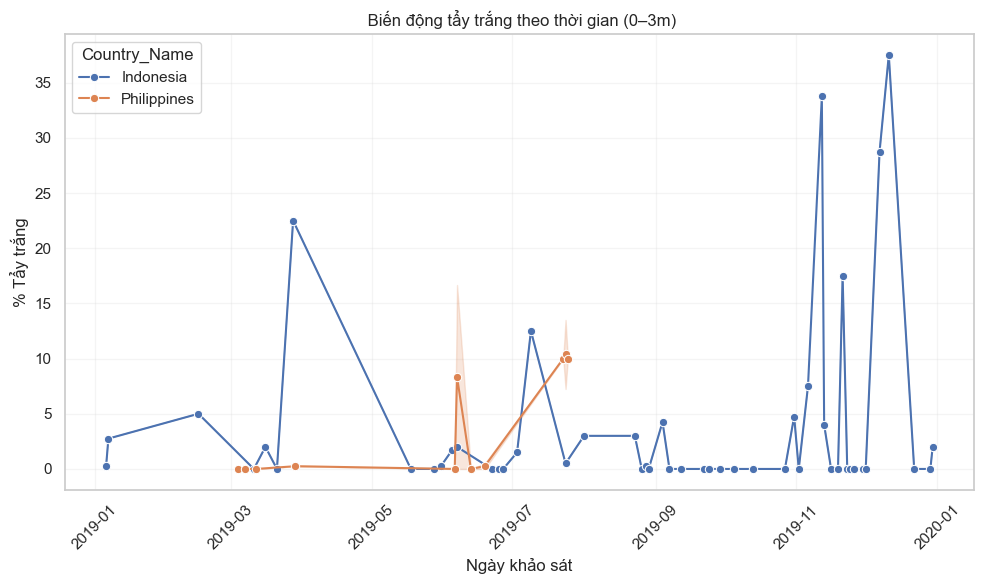

In [156]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered,
    x='Date',
    y='Percent_Bleaching',
    hue='Country_Name',
    marker='o'
)
plt.title(' Biến động tẩy trắng theo thời gian (0–3m)')
plt.xlabel('Ngày khảo sát')
plt.ylabel('% Tẩy trắng')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


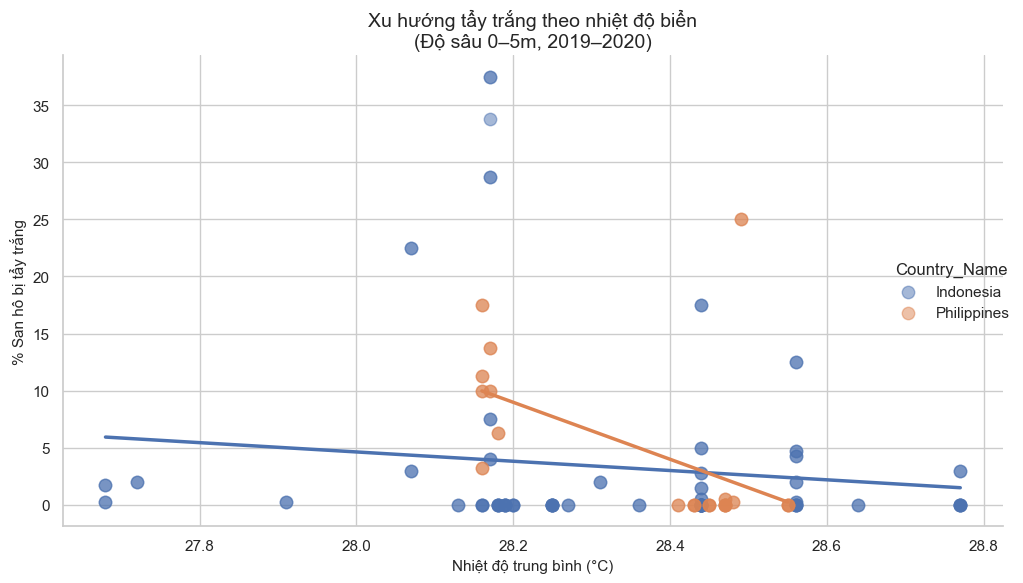

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df_filtered,
    x='Temperature_Mean',
    y='Percent_Bleaching',
    hue='Country_Name',
    aspect=1.5,
    height=6,
    ci=None,   
    scatter_kws={'alpha': 0.5, 's': 80},
    line_kws={'linewidth': 2.5}
)

# Trang trí biểu đồ
plt.xlabel('Nhiệt độ trung bình (°C)', fontsize=11)
plt.ylabel('% San hô bị tẩy trắng', fontsize=11)
plt.title('Xu hướng tẩy trắng theo nhiệt độ biển\n(Độ sâu 0–5m, 2019–2020)', fontsize=14)
plt.tight_layout()
plt.savefig('/Users/vythu/Desktop/my_chart.png', dpi=300, bbox_inches='tight')

plt.show()


In [170]:
df_filtered.to_csv('filtered_bleaching_2019_2020_0to5m.csv', index=False)
print(" Đã lưu xong dữ liệu đã lọc!")


 Đã lưu xong dữ liệu đã lọc!


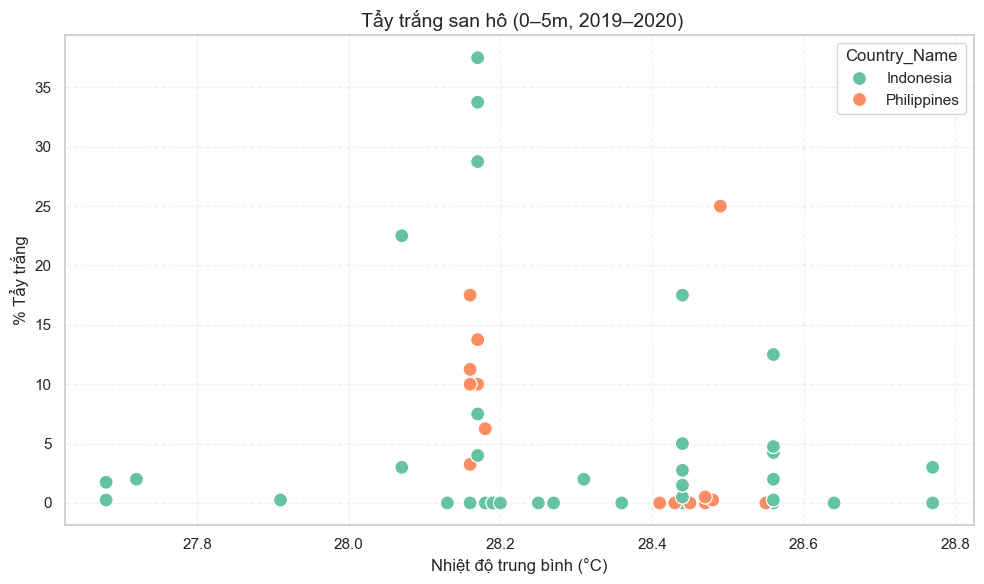

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='Temperature_Mean',
    y='Percent_Bleaching',
    hue='Country_Name',
    s=100,
    palette='Set2'
)
plt.title(' Tẩy trắng san hô (0–5m, 2019–2020)', fontsize=14)
plt.xlabel('Nhiệt độ trung bình (°C)')
plt.ylabel('% Tẩy trắng')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('/Users/vythu/Desktop/my_chart.png', dpi=300, bbox_inches='tight')
plt.show()


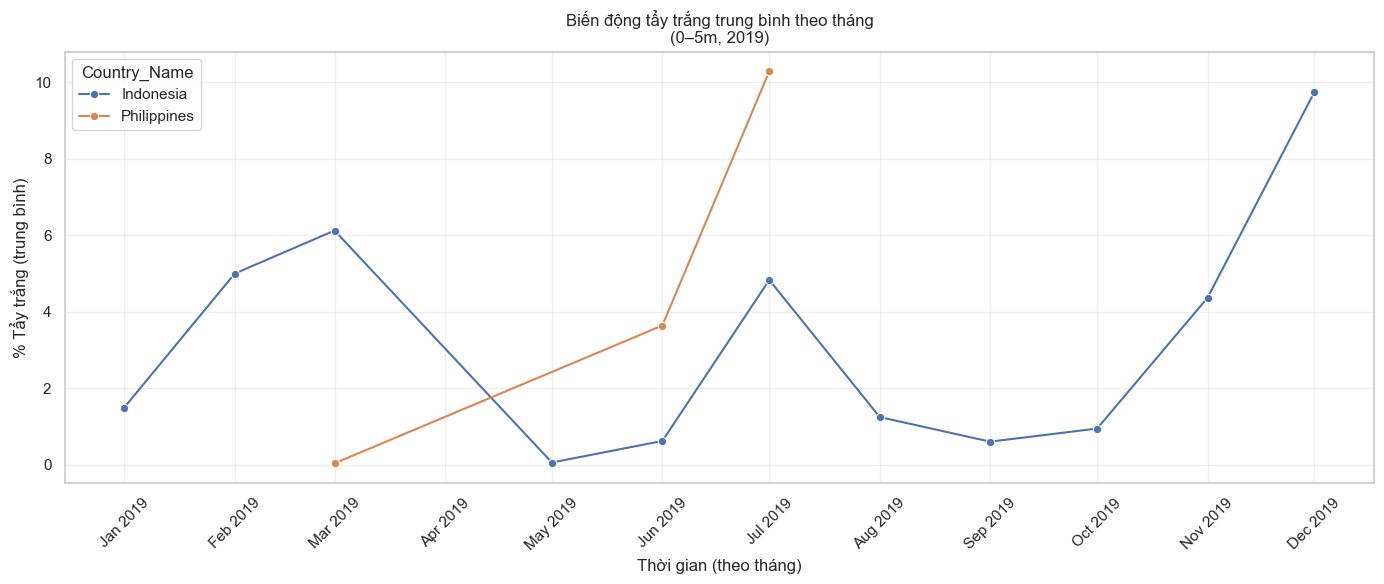

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Gộp theo tháng
df_filtered['Month'] = df_filtered['Date'].dt.to_period('M')
monthly_avg = df_filtered.groupby(['Month', 'Country_Name'])['Percent_Bleaching'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()

# Tạo danh sách các tháng của năm 2019 
month_range = pd.date_range(start='2019-01-01', end='2019-12-31', freq='MS')

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_avg,
    x='Month',
    y='Percent_Bleaching',
    hue='Country_Name',
    marker='o'
)

# Cài trục X hiển thị đúng 12 tháng
plt.xticks(month_range, [d.strftime('%b %Y') for d in month_range], rotation=45)
plt.title('Biến động tẩy trắng trung bình theo tháng\n(0–5m, 2019)')
plt.xlabel('Thời gian (theo tháng)')
plt.ylabel('% Tẩy trắng (trung bình)')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.savefig('/Users/vythu/Desktop/my_chart.png', dpi=300, bbox_inches='tight')
plt.show()


In [178]:
# Xuất dữ liệu trung bình ra CSV
monthly_avg.to_csv('monthly_bleaching_avg_2019_2020.csv', index=False)
print("Đã xuất file thành công: monthly_bleaching_avg_2019_2020.csv")


Đã xuất file thành công: monthly_bleaching_avg_2019_2020.csv


/var/folders/nx/7w7q2k_d3t945q0wmjmfft000000gn/T/ipykernel_10843/2079361574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


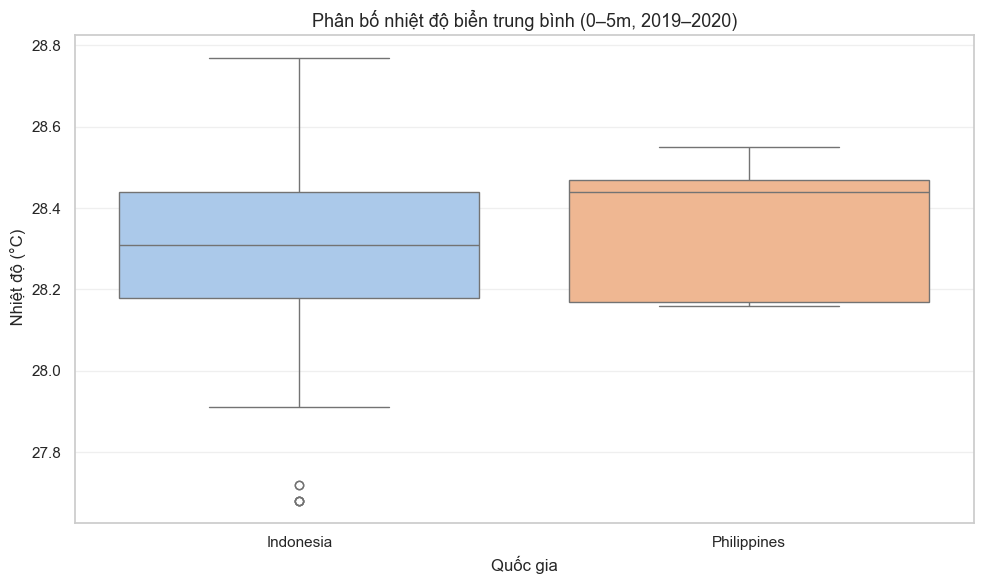

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_filtered,
    x='Country_Name',
    y='Temperature_Mean',
    palette='pastel'
)

plt.title('Phân bố nhiệt độ biển trung bình (0–5m, 2019–2020)', fontsize=13)
plt.xlabel('Quốc gia')
plt.ylabel(' Nhiệt độ (°C)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('/Users/vythu/Desktop/my_chart.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/nx/7w7q2k_d3t945q0wmjmfft000000gn/T/ipykernel_10843/1591837149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


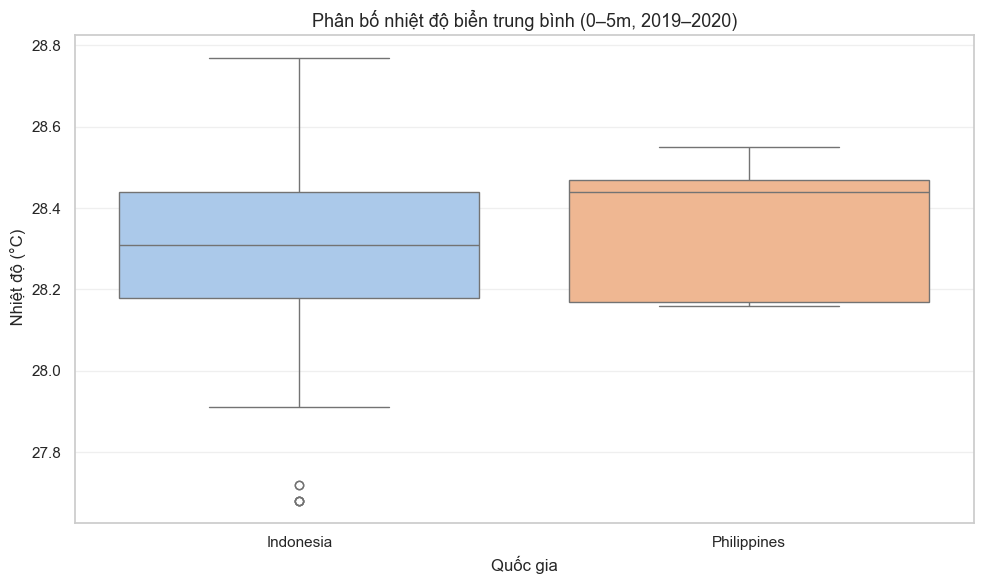

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_filtered,
    x='Country_Name',
    y='Temperature_Mean',
    palette='pastel'
)

plt.title('Phân bố nhiệt độ biển trung bình (0–5m, 2019–2020)', fontsize=13)
plt.xlabel('Quốc gia')
plt.ylabel(' Nhiệt độ (°C)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/nx/7w7q2k_d3t945q0wmjmfft000000gn/T/ipykernel_10843/1591837149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


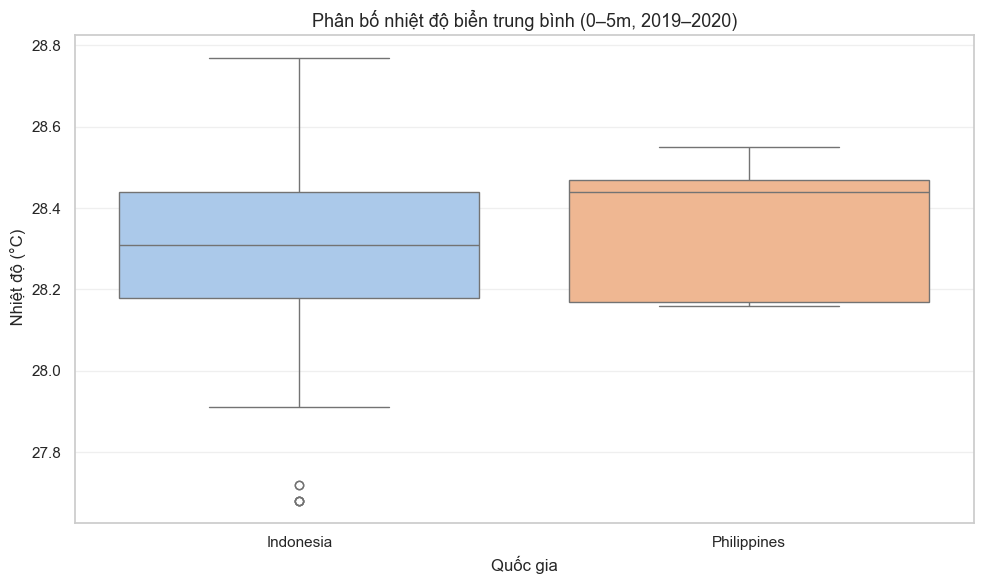

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_filtered,
    x='Country_Name',
    y='Temperature_Mean',
    palette='pastel'
)

plt.title('Phân bố nhiệt độ biển trung bình (0–5m, 2019–2020)', fontsize=13)
plt.xlabel('Quốc gia')
plt.ylabel(' Nhiệt độ (°C)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
 
plt.show()


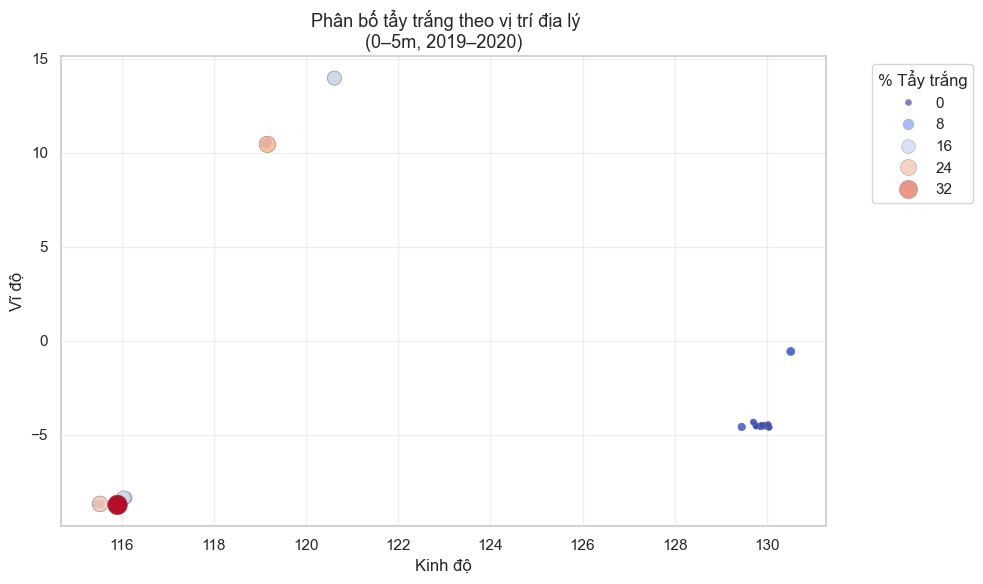

In [196]:
 plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='Longitude_Degrees',
    y='Latitude_Degrees',
    hue='Percent_Bleaching',
    size='Percent_Bleaching',
    sizes=(20, 200),
    palette='coolwarm',
    alpha=0.7,
    edgecolor='gray'
)

plt.title(' Phân bố tẩy trắng theo vị trí địa lý\n(0–5m, 2019–2020)', fontsize=13)
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.grid(True, alpha=0.3)
plt.legend(title='% Tẩy trắng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/Users/vythu/Desktop/scatter_temp_bleaching.png', dpi=300, bbox_inches='tight')
plt.show()


In [188]:
import os
print(" Đang lưu file tại thư mục:", os.getcwd())


 Đang lưu file tại thư mục: /Users/vythu/Maple Network Tools
